In [425]:
import sklearn
print('This must be at least version 0.20.0')
print('If it is not, you must upgrade conda and scikit-learn.')
sklearn.__version__

This must be at least version 0.20.0
If it is not, you must upgrade conda and scikit-learn.


'0.20.0'

In [426]:
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import os
import seaborn as sns
from IPython.display import display
from jupyterthemes import jtplot
jtplot.style()

In [427]:
def load_data(data_path=''):
    csv_path = os.path.join(data_path, "dodgers.csv")
    return pd.read_csv(csv_path)

In [428]:
dodgers = load_data()
display(dodgers.head())
display(dodgers.describe())
display(dodgers.isna().sum())

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

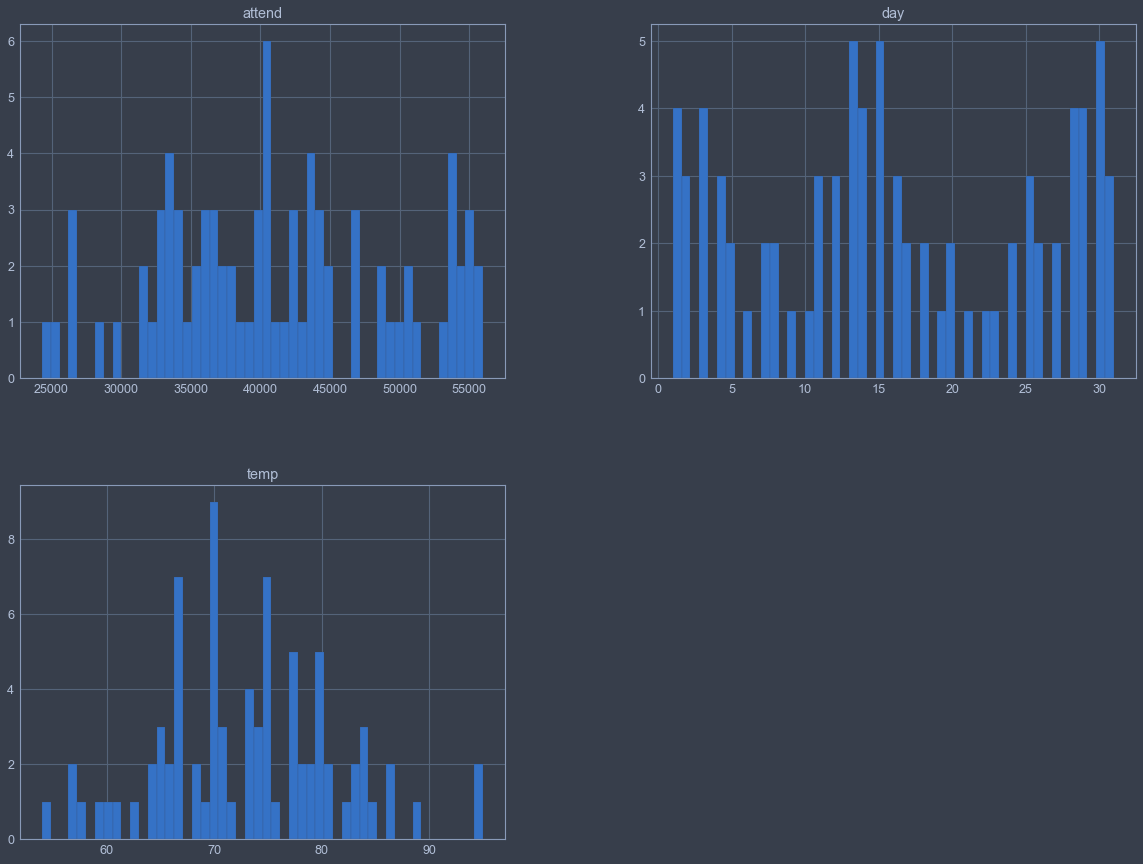

In [429]:
dodgers.hist(bins=50, figsize=(20, 15))
plt.show()

In [430]:
corr_matrix = dodgers.corr()
corr_matrix['attend'].sort_values(ascending=False)

attend    1.000000
temp      0.098951
day       0.027093
Name: attend, dtype: float64

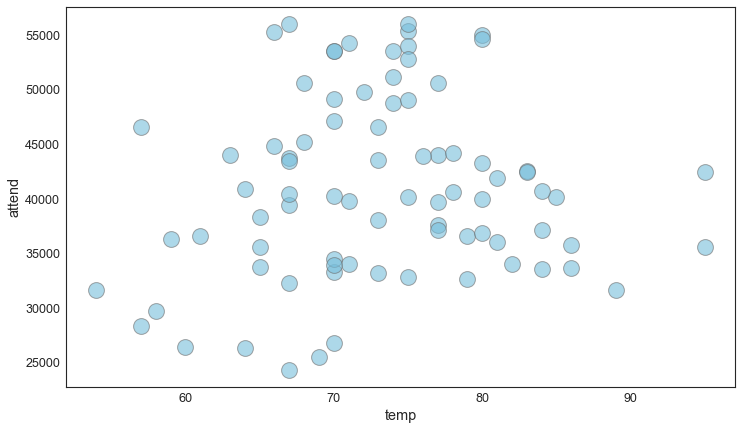

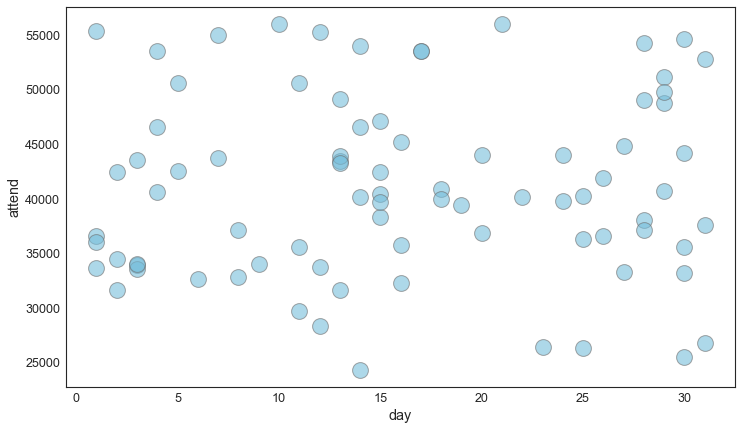

In [431]:
def plot_num_attribs(x):
    sns.set_palette('Set3')
    sns.set_style('white')
    dodgers.plot(
        kind='scatter',
        s=250,
        x=x,
        y='attend',
        alpha=.6,
        c='c',
        edgecolor='#6d6d6d',
        linewidth=1,
        figsize=(12,7)
    )
    plt.show()
for x in ['temp', 'day']: plot_num_attribs(x)

In [432]:
dodgers = dodgers.drop('day', axis=1)
display(dodgers.head())

,month,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [433]:
dodgers.bobblehead = np.where(dodgers.bobblehead.str.contains('YES'), 1, 0)
display(dodgers.bobblehead.head())

0    0
1    0
2    0
3    0
4    0
Name: bobblehead, dtype: int64

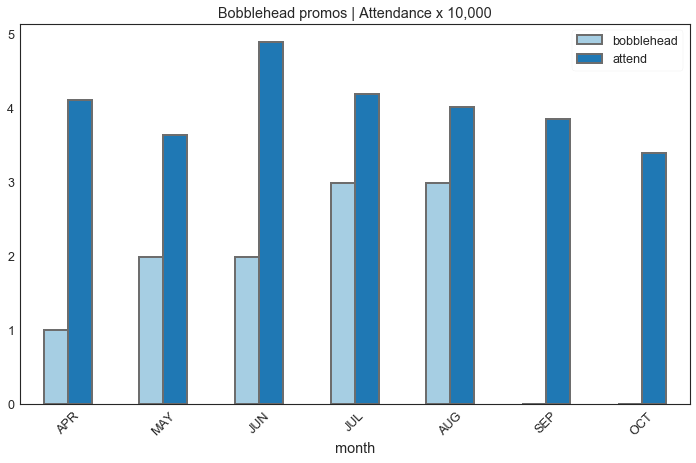

In [434]:
months = dodgers.month.unique()
heads_per_month = dodgers.groupby('month', as_index=False).agg({
    'bobblehead': sum,
    'attend': np.median,
})
heads_per_month.month = pd.Categorical(heads_per_month['month'], categories=months, ordered=True)
heads_per_month.attend = heads_per_month.attend / 10000
heads_per_month = heads_per_month.sort_values(by='month')
plt.figure(figsize=(12, 7))
sns.set_palette('Paired')
sns.set_style('white')
heads_per_month.plot(
    x='month',
    ax=plt.gca(), 
    kind='bar', 
    edgecolor='#6d6d6d',
    linewidth=2
)
plt.xticks(rotation=45)
plt.title('Bobblehead promos | Attendance x 10,000')
plt.show()

In [435]:
def simple_encoder(series):
    return np.where(series.str.contains('YES'), 1, 0)
for series in ['cap', 'shirt', 'fireworks']:
    dodgers[series] = simple_encoder(dodgers[series])
dodgers.head()

,month,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,56000,Tuesday,Pirates,67,Clear,Day,0,0,0,0
1,APR,29729,Wednesday,Pirates,58,Cloudy,Night,0,0,0,0
2,APR,28328,Thursday,Pirates,57,Cloudy,Night,0,0,0,0
3,APR,31601,Friday,Padres,54,Cloudy,Night,0,0,1,0
4,APR,46549,Saturday,Padres,57,Cloudy,Night,0,0,0,0


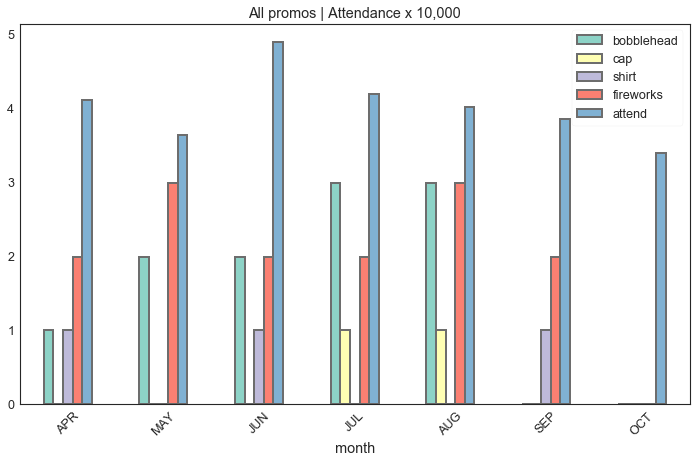

In [436]:
promos_per_month = dodgers.groupby('month', as_index=False).agg({
    'bobblehead': sum,
    'cap': sum,
    'shirt': sum,
    'fireworks': sum,
    'attend': np.median,
})
promos_per_month.month = pd.Categorical(promos_per_month['month'], categories=months, ordered=True)
promos_per_month.attend = promos_per_month.attend / 10000
promos_per_month = promos_per_month.sort_values(by='month')
plt.figure(figsize=(12, 7))
sns.set_palette('Set3')
sns.set_style('white')
promos_per_month.plot(
    x='month',
    ax=plt.gca(), 
    kind='bar', 
    edgecolor='#6d6d6d',
    linewidth=2
)
plt.xticks(rotation=45)
plt.title('All promos | Attendance x 10,000')
plt.show()

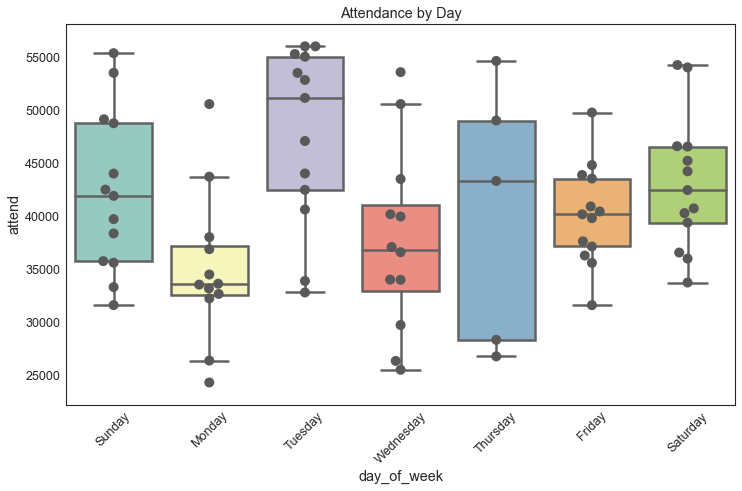

In [437]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',]
att_day = dodgers.loc[:,['day_of_week', 'attend']]
att_day.day_of_week = pd.Categorical(att_day['day_of_week'], categories=days, ordered=True)
att_day = att_day.sort_values(by='day_of_week')
plt.figure(figsize=(12, 7))
sns.set_palette('Set3')
sns.set_style('white')
sns.boxplot(x='day_of_week', y='attend', data=att_day, linewidth=2.5)
sns.swarmplot(x='day_of_week', y='attend', data=att_day, color='.35', size=10)
plt.xticks(rotation=45)
plt.title('Attendance by Day')
plt.show()

In [438]:
dodgers = load_data()
dodgers = dodgers.drop('day', axis=1)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dodgers, dodgers['month']):
    strat_train_set = dodgers.loc[train_index]
    strat_test_set = dodgers.loc[test_index]
display(strat_test_set['month'].value_counts() / len(strat_test_set))
display(strat_train_set['month'].value_counts() / len(strat_train_set))

MAY    0.235294
SEP    0.176471
AUG    0.176471
APR    0.117647
JUN    0.117647
JUL    0.117647
OCT    0.058824
Name: month, dtype: float64

MAY    0.218750
AUG    0.187500
APR    0.156250
JUL    0.156250
SEP    0.140625
JUN    0.109375
OCT    0.031250
Name: month, dtype: float64

In [439]:
from sklearn.base import BaseEstimator, TransformerMixin
month_ix, bobble_ix, fireworks_ix, shirt_ix, cap_ix = 0, 10, 9, 8, 7

class PromoAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X['bobblehead'] = 'bobble' + X['bobblehead']
        X['fireworks'] = 'fireworks' + X['fireworks']
        X['shirt'] = 'shirt' + X['shirt']
        X['cap'] = 'cap' + X['cap']
        return X

In [440]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_attribs = ['temp']
promo_attribs = ['cap', 'shirt', 'fireworks', 'bobblehead']
cat_attribs = ['month', 'day_of_week', 'opponent', 'skies', 'day_night']
promo_pipeline = Pipeline([
    ('promo_adder', PromoAttributesAdder()),
    ('one_hot', OneHotEncoder())
])
pipeline =  ColumnTransformer([
    ('num', StandardScaler(), num_attribs),
    ('promo', promo_pipeline, promo_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

In [441]:
ballpark = strat_train_set.drop('attend', axis=1)
ballpark_label = strat_train_set['attend'].copy()
ballpark_prepared = pipeline.fit_transform(ballpark)

In [442]:
print(dodgers.shape, ballpark_prepared.shape, strat_test_set.shape, sep=' ')
display(type(ballpark_prepared))

(81, 11) (64, 44) (17, 11)


scipy.sparse.csr.csr_matrix

In [443]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(ballpark_prepared, ballpark_label)
X_test = strat_test_set.drop('attend', axis=1)
y_test = strat_test_set['attend'].copy()
X_prepped = pipeline.transform(X_test)
reg_pred = lin_reg.predict(X_prepped)
reg_rmse = np.sqrt(mean_squared_error(y_test, reg_pred))
print('Linear Regression RMSE:', round(reg_rmse, 2))

Linear Regression RMSE: 7665.66


In [444]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
forest_reg = RandomForestRegressor()
param_grid = [
    {'n_estimators': [100, 250, 500], 'max_features': [12, 24, 36]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(ballpark_prepared, ballpark_label)
display(grid_search.best_params_)
display(grid_search.best_estimator_)

{'max_features': 12, 'n_estimators': 500}

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=12, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [445]:
rf_rmse = round(np.sqrt(-grid_search.cv_results_['mean_test_score'].min()), 2)
print('Random Forest Regressor RMSE:', rf_rmse)
feature_importances = grid_search.best_estimator_.feature_importances_
cat_en = pipeline.named_transformers_['cat']
cat_attribs = list(cat_en.get_feature_names())
promo_pipe = pipeline.named_transformers_['promo']
promo_en = promo_pipe.named_steps['one_hot']
promo_attribs = list(promo_en.get_feature_names())
print('\nFeature Importance Top 10')
sorted(zip(feature_importances, num_attribs + cat_attribs + promo_attribs), reverse=True)[:10]

Random Forest Regressor RMSE: 7699.2

Feature Importance Top 10


[(0.15315173873916918, 'temp'),
 (0.12655436364374456, 'x0_SEP'),
 (0.1166879075654176, 'x1_Friday'),
 (0.05561107725239122, 'x2_Giants'),
 (0.054751310434829614, 'x1_Thursday'),
 (0.03534986062273345, 'x2_Braves'),
 (0.029916382357965104, 'x2_Marlins'),
 (0.027991327434478283, 'x2_Padres'),
 (0.02257235401959451, 'x1_Monday'),
 (0.022528218400620425, 'x2_Phillies')]

In [446]:
baseline = np.median(dodgers.attend)
baseline_pred = baseline - y_test
baseline_rmse = round(np.sqrt(mean_squared_error(y_test, reg_pred)), 2)
reg_rmse = round(reg_rmse, 2)

In [447]:
print('Baseline RMSE:', baseline_rmse)
print('Linear Regression RMSE:', reg_rmse)
print('Random Forest Regressor RMSE:', rf_rmse)

Baseline RMSE: 7665.66
Linear Regression RMSE: 7665.66
Random Forest Regressor RMSE: 7699.2
